# Ontology Search

This program will load and explore the Cell Ontology from https://www.ebi.ac.uk/ols/ontologies/cl

From the above site, you can download the ontology file as *cl.owl*.

The leafs in the ontology file contain information from the following:

- BFO: Basic Formal Ontology 
- CARO: Common Anatomy Reference Ontology
- CHEBI: Chemical Entities of Biological Interest
- CL: Cell Ontology
- CP: unclear meaning
- http: start of website, inclusion is unclear
- GO: Gene Ontology
- NCBITaxon: ncbitaxon
- PATO: Phenotype and Trait Ontology
- PR: Protein Ontology
- RO: Relations Ontology
- UBERON: Uber-anatomy ontology



To acess the ontology, we will use *pronto*, which can be installed with *pip*. Some resources:

- From https://github.com/althonos/pronto
- DOI: https://doi.org/10.5281/zenodo.595572
- PDF of release notes: https://pronto.readthedocs.io/_/downloads/en/latest/pdf/

In [52]:
from pronto import Ontology

import seaborn as sns
import numpy as np

import json
import urllib.request

import pandas as pd


In [2]:
cl = Ontology.from_obo_library('cl.owl')

/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:289: SyntaxWarning: <Element '{http://purl.org/dc/elements/1.1/}description' at 0x7f84f9d11270> contains text but no `xsd:datatype`
  meta.annotations.add(self._extract_literal_pv(child))
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:289: SyntaxWarning: <Element '{http://purl.org/dc/elements/1.1/}title' at 0x7f84f9d114a0> contains text but no `xsd:datatype`
  meta.annotations.add(self._extract_literal_pv(child))
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:289: SyntaxWarning: <Element '{http://www.w3.org/2002/07/owl#}versionInfo' at 0x7f84f9d11b30> contains text but no `xsd:datatype`
  meta.annotations.add(self._extract_literal_pv(child))
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:113: SyntaxWarning: unknown elem

/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:117: SyntaxWarning: unknown element in `owl:Class`: {http://purl.org/dc/terms/}contributor
  self._extract_term(class_, curies)
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:117: SyntaxWarning: unknown element in `owl:Class`: {http://xmlns.com/foaf/0.1/}depicted_by
  self._extract_term(class_, curies)
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:117: SyntaxWarning: unknown element in `owl:Class`: {http://www.geneontology.org/formats/oboInOwl#}note
  self._extract_term(class_, curies)
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:117: SyntaxWarning: unknown element in `owl:Class`: {http://purl.obolibrary.org/obo/}IAO_0000119
  self._extract_term(class_, curies)
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/py

/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/ontology.py:283: SyntaxWarning: unknown axiom property: 'http://purl.obolibrary.org/obo/UBPROP_0000001'
  cls(self).parse_from(_handle)  # type: ignore
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/ontology.py:283: SyntaxWarning: unknown axiom property: 'http://purl.obolibrary.org/obo/UBPROP_0000003'
  cls(self).parse_from(_handle)  # type: ignore
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/ontology.py:283: SyntaxWarning: unknown axiom property: 'http://purl.obolibrary.org/obo/UBPROP_0000012'
  cls(self).parse_from(_handle)  # type: ignore
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/ontology.py:283: SyntaxWarning: unknown axiom property: 'http://purl.obolibrary.org/obo/UBPROP_0000008'
  cls(self).parse_from(_handle)  # type: ignore
/Users/josh.fuchs/My Drive/Personal/michigan/venv/li

In [3]:
cl

Ontology('http://purl.obolibrary.org/obo/cl.owl')

In [4]:
cl['CL:0002116']

Term('CL:0002116', name='B220-low CD38-positive unswitched memory B cell')

## Get tree structure

In [5]:
def find_parent(subclass, distance=1):
    '''
    Finds parent(s) of input subclass for current ontology, which must be loaded as cl. Parents will be 
    found within input distance of subclass. Immediate parents correspond with distance = 1. 
    
    Parameters
    ----------
    subclass : str
        string with full name of subclass you want to identify the parents of
        
    distance (optional): int
        distance from subclass you want to find parents of
        default = 1
        
    Returns
    -------
    parents : list
        list of parents for input subclass
    '''
    root_node = cl[subclass]
    parents = []
    for term in root_node.superclasses(distance=distance,with_self=False).to_set():
        parents.append(term.id)
    return parents

In [6]:
def find_children(supperclass, distance=1):
    '''
    Finds children of input subclass for current ontology, which must be loaded as cl. Children will be 
    found within input distance of subclass. Immediate children correspond with distance = 1. 
    
    Parameters
    ----------
    subclass : str
        string with full name of subclass you want to identify the children of
        
    distance (optional): int
        distance from subclass you want to find children of
        default = 1
        
    Returns
    -------
    parents : list
        list of children for input subclass
    '''
    root_node = cl[supperclass]
    children = []
    for term in root_node.subclasses(distance=distance,with_self=False).to_set():
        children.append(term.id)
    return children

In [7]:
def get_tree(root,tree_dict,parents_or_children,level=0,top_parent = 'CL:0000000'):
    '''
    Determines tree structure starting with a leaf and identifying all superclasses/parents
    
    Parameters
    ----------
    root : str
        string with full name of ID you want to identify the parents of
        
    tree_dict : dictionary
        dictionary with tree. keys are levels, where level=0 is the initial leaf.
        values are ontology IDs
        
    level (optional): int
        level of root to build tree dictionary
        default = 0
        
    top_parent : string
        top level of ontology you wish you classify to. Used only if you want to return a subset
        of the ontology
        default = 'CL:0000000' (Cell in the Cell Ontology)
        
    Returns
    -------
    tree_dict : dictionary
        dictionary of tree given inital root. 
        keys are levels, where level=0 is the initial leaf.
        values are ontology IDs
        There will be duplicates in the keys because of multiple inheritance
        Can run list(set(key)) to remove duplicates
    '''


    # add root to dictionary if level = 0
    # need to check if level in tree_dict in case
    # we are iterating over multiple leafs
    if level == 0:
        if level in tree_dict:
            tree_dict[level].append(root)
        else:
            tree_dict[level] = [root]
    
    # get parent ids
    if parents_or_children == 'parents':
        parents_of_id = find_parent(root)
    elif parents_or_children == 'children':
        parents_of_id = find_children(root)
    level += 1
    
    # add parents to dictionary
    if level in tree_dict:
        tree_dict[level] += parents_of_id
    else:
        tree_dict[level] = parents_of_id

    if top_parent in parents_of_id: #parents_of_id is None:
        pass
    else:
        for parent in parents_of_id:
            tree_dict = get_tree(parent,tree_dict,parents_or_children=parents_or_children,level=level,top_parent = top_parent)
    
    return tree_dict


In [19]:
tree_dict = {}
tree_dict = get_tree('CL:0000934',tree_dict,level=0)

# tree dict will have duplicates
# so let's remove them now

# for key, value in tree_dict.items():
#     tree_dict[key] = list(set(value))
    
tree_dict

{0: ['CL:0000934'],
 1: ['CL:0000624'],
 2: ['CL:0000791'],
 3: ['CL:0000789', 'CL:0002419'],
 4: ['CL:0000084', 'CARO:0000006', 'CL:0000084', 'CARO:0000006'],
 5: ['CL:0000542', 'CARO:0000000', 'CL:0000542', 'CARO:0000000'],
 6: ['PR:000050567',
  'CL:0000842',
  'CARO:0030000',
  'PR:000050567',
  'CL:0000842',
  'CARO:0030000'],
 7: ['BFO:0000040',
  'CL:0000738',
  'CL:0000226',
  'BFO:0000004',
  'BFO:0000040',
  'CL:0000738',
  'CL:0000226',
  'BFO:0000004'],
 8: ['BFO:0000004',
  'CL:0002242',
  'CL:0000219',
  'CL:0000988',
  'CARO:0000000',
  'CL:0002242',
  'BFO:0000002',
  'BFO:0000004',
  'CL:0002242',
  'CL:0000219',
  'CL:0000988',
  'CARO:0000000',
  'CL:0002242',
  'BFO:0000002'],
 9: ['BFO:0000002',
  'CL:0000003',
  'CL:0000003',
  'CL:0002371',
  'CARO:0030000',
  'CL:0000003',
  'BFO:0000002',
  'CL:0000003',
  'CL:0000003',
  'CL:0002371',
  'CARO:0030000',
  'CL:0000003'],
 10: ['CL:0000000',
  'CL:0000000',
  'CL:0000548',
  'BFO:0000004',
  'CL:0000000',
  'CL:0

In [32]:
leafs = ['CL:0000900', 'CL:0000934', 'CL:0001044']

leafs_dict_test = {}

for x in leafs:
    leafs_dict_test = get_tree(x,leafs_dict_test,level=0)

# leafs_dict_test will have duplicates
# so let's remove them now

for key, value in leafs_dict_test.items():
    leafs_dict_test[key] = list(set(value))
        
leafs_dict_test

{0: ['CL:0001044', 'CL:0000900', 'CL:0000934'],
 1: ['CL:0000625', 'CL:0000911', 'CL:0000898', 'CL:0000624'],
 2: ['CL:0002419', 'CL:0000791'],
 3: ['CL:0000084', 'CL:0002419', 'CL:0000789', 'CARO:0000006', 'PR:000050567'],
 4: ['CL:0000542',
  'CL:0000084',
  'BFO:0000040',
  'CARO:0000000',
  'CARO:0000006',
  'PR:000050567'],
 5: ['CL:0000542',
  'CARO:0030000',
  'CL:0000842',
  'BFO:0000040',
  'BFO:0000004',
  'CARO:0000000'],
 6: ['CL:0000226',
  'CARO:0030000',
  'CL:0000738',
  'CL:0000842',
  'BFO:0000004',
  'BFO:0000002'],
 7: ['CL:0000219',
  'CL:0000226',
  'CL:0000738',
  'CL:0000988',
  'BFO:0000004',
  'CARO:0000000',
  'CL:0002242',
  'BFO:0000002'],
 8: ['CL:0000219',
  'CARO:0030000',
  'CL:0002371',
  'CL:0000988',
  'CL:0000003',
  'CL:0000548',
  'CARO:0000000',
  'CL:0002242',
  'BFO:0000002'],
 9: ['CARO:0030000',
  'CL:0002371',
  'CL:0000000',
  'CL:0000003',
  'CL:0000548',
  'BFO:0000004',
  'CL:0000255'],
 10: ['BFO:0000002', 'CL:0000000', 'CL:0000003', 'B

## Get tree for all leafs

In [10]:
# from leaf_list only keep those in the cell ontology that start with CL

cl_leaf_list = [x for x in leaf_list if x.startswith('CL')]

len(cl_leaf_list)

1913

In [11]:

cl_leafs_tree = {}

for x in cl_leaf_list:
    cl_leafs_tree = get_tree(x,cl_leafs_tree,level=0)

# leafs_dict_test will have duplicates
# so let's remove them now

for key, value in cl_leafs_tree.items():
    cl_leafs_tree[key] = list(set(value))
        
cl_leafs_tree

{0: ['CL:0000965',
  'CL:1000322',
  'CL:1000356',
  'CL:0000982',
  'CL:0000337',
  'CL:0009062',
  'CL:0000258',
  'CL:0002675',
  'CL:2000024',
  'CL:0009110',
  'CL:0002102',
  'CL:0000647',
  'CL:0000042',
  'CL:0000853',
  'CL:0004238',
  'CL:0009053',
  'CL:0004225',
  'CL:0002285',
  'CL:0002594',
  'CL:0002046',
  'CL:0000615',
  'CL:4023031',
  'CL:0000352',
  'CL:0004244',
  'CL:4023164',
  'CL:0002538',
  'CL:4023026',
  'CL:0000418',
  'CL:0000783',
  'CL:0005017',
  'CL:0002530',
  'CL:1000304',
  'CL:1001107',
  'CL:2000057',
  'CL:4023104',
  'CL:4030012',
  'CL:1000397',
  'CL:0001075',
  'CL:0002345',
  'CL:1001097',
  'CL:0002524',
  'CL:0002244',
  'CL:4032000',
  'CL:0000032',
  'CL:0002585',
  'CL:0000544',
  'CL:4023181',
  'CL:1000358',
  'CL:4023055',
  'CL:4023052',
  'CL:0000950',
  'CL:4030025',
  'CL:1001005',
  'CL:4023094',
  'CL:0000480',
  'CL:0002367',
  'CL:0000695',
  'CL:0002383',
  'CL:0002289',
  'CL:0000110',
  'CL:0000534',
  'CL:4023098',
  'CL

In [14]:
# find duplicate values in dictionary

flipped = {}

for key, value in cl_leafs_tree.items():
    for x in value:
        if x not in flipped:
            flipped[x] = [key]
        else:
            flipped[x].append(key)

In [15]:
flipped

{'CL:0000965': [0],
 'CL:1000322': [0],
 'CL:1000356': [0],
 'CL:0000982': [0],
 'CL:0000337': [0],
 'CL:0009062': [0],
 'CL:0000258': [0],
 'CL:0002675': [0],
 'CL:2000024': [0],
 'CL:0009110': [0],
 'CL:0002102': [0],
 'CL:0000647': [0],
 'CL:0000042': [0],
 'CL:0000853': [0],
 'CL:0004238': [0],
 'CL:0009053': [0],
 'CL:0004225': [0],
 'CL:0002285': [0],
 'CL:0002594': [0],
 'CL:0002046': [0],
 'CL:0000615': [0],
 'CL:4023031': [0],
 'CL:0000352': [0],
 'CL:0004244': [0],
 'CL:4023164': [0],
 'CL:0002538': [0],
 'CL:4023026': [0],
 'CL:0000418': [0],
 'CL:0000783': [0],
 'CL:0005017': [0],
 'CL:0002530': [0],
 'CL:1000304': [0],
 'CL:1001107': [0],
 'CL:2000057': [0],
 'CL:4023104': [0],
 'CL:4030012': [0],
 'CL:1000397': [0],
 'CL:0001075': [0],
 'CL:0002345': [0],
 'CL:1001097': [0],
 'CL:0002524': [0],
 'CL:0002244': [0],
 'CL:4032000': [0],
 'CL:0000032': [0],
 'CL:0002585': [0],
 'CL:0000544': [0],
 'CL:4023181': [0],
 'CL:1000358': [0],
 'CL:4023055': [0],
 'CL:4023052': [0],


In [17]:
for key, value in flipped.items():
    if len(value) > 1:
        print(key, value)

CL:0000075 [1, 2, 3, 4, 5, 6, 7]
CL:0000069 [1, 2, 3]
CL:0002075 [1, 2]
CL:0000066 [1, 2, 3, 4, 5, 6, 7, 8]
CL:0002659 [1, 2, 3]
CL:2000032 [1, 2, 3]
CL:0002252 [1, 2]
CL:1001610 [1, 2]
CL:0000081 [1, 2, 3, 4, 5]
CL:0000120 [1, 3]
CL:1001433 [1, 2]
CL:0000019 [1, 2]
CL:0000412 [1, 3]
CL:1000617 [1, 2]
CL:0002405 [1, 2]
CL:0002393 [1, 3, 4]
CL:0002305 [1, 2, 3]
CL:0000817 [1, 2, 3, 4]
CL:0001035 [1, 2, 3, 4]
CL:0002494 [1, 2, 3, 4, 5, 6]
CL:0000080 [1, 2, 3]
CL:0000077 [1, 2]
CL:0000006 [1, 2, 3, 4, 5, 6]
CL:0000459 [1, 2]
CL:0000784 [1, 2]
CL:2000029 [1, 2, 3, 4, 5, 6]
CL:1000510 [1, 2, 3]
CL:0010003 [1, 2]
CL:0000841 [1, 2]
CL:0000034 [1, 2, 3, 4, 5, 6, 7]
CL:0000453 [1, 2]
CL:0011004 [1, 2]
CL:0000151 [1, 2, 3, 4, 5, 6, 7]
CL:0000150 [1, 2, 3, 4, 5]
CL:0001019 [1, 3, 4, 5]
CL:0000838 [1, 2]
CL:0000134 [1, 2, 3]
CL:0000679 [1, 2, 3, 4]
CL:4030034 [1, 2]
CL:0000161 [1, 2, 3, 4, 5, 6]
CL:1000507 [1, 3, 4, 5]
CL:0002608 [1, 2]
CL:0000598 [1, 2, 3, 4]
CL:0000035 [1, 2, 3, 4, 5]
CL:0000235

### Identify all Leaf Nodes

In [7]:
leaf_list = []

for term in cl.terms():
    if term.is_leaf():
        leaf_list.append(term.id)

In [8]:
leaf_list

['BFO:0000006',
 'BFO:0000019',
 'BFO:0000031',
 'BFO:0000034',
 'CARO:0000004',
 'CARO:0000010',
 'CARO:0000012',
 'CARO:0000013',
 'CARO:0000014',
 'CARO:0000032',
 'CARO:0000040',
 'CARO:0000042',
 'CARO:0000054',
 'CHEBI:14321',
 'CHEBI:15355',
 'CHEBI:15377',
 'CHEBI:15379',
 'CHEBI:15440',
 'CHEBI:16336',
 'CHEBI:16480',
 'CHEBI:16541',
 'CHEBI:16646',
 'CHEBI:16670',
 'CHEBI:16796',
 'CHEBI:16990',
 'CHEBI:16991',
 'CHEBI:17026',
 'CHEBI:17087',
 'CHEBI:17089',
 'CHEBI:17234',
 'CHEBI:17347',
 'CHEBI:17478',
 'CHEBI:17544',
 'CHEBI:18059',
 'CHEBI:18085',
 'CHEBI:18133',
 'CHEBI:18154',
 'CHEBI:18421',
 'CHEBI:22868',
 'CHEBI:23897',
 'CHEBI:23906',
 'CHEBI:23965',
 'CHEBI:24261',
 'CHEBI:24318',
 'CHEBI:24402',
 'CHEBI:24431',
 'CHEBI:24505',
 'CHEBI:24780',
 'CHEBI:24828',
 'CHEBI:24835',
 'CHEBI:24867',
 'CHEBI:24875',
 'CHEBI:24943',
 'CHEBI:25354',
 'CHEBI:25805',
 'CHEBI:25806',
 'CHEBI:25905',
 'CHEBI:26020',
 'CHEBI:26650',
 'CHEBI:26764',
 'CHEBI:27547',
 'CHEBI:27584',

In [7]:
# identify starting identifies of all leafs

unique_identifiers = []
             
for x in leaf_list:
    split_leaf = x.split(':')
    if split_leaf[0] not in unique_identifiers:
        unique_identifiers.append(split_leaf[0])

print(unique_identifiers)    

['BFO', 'CARO', 'CHEBI', 'CL', 'CP', 'http', 'GO', 'NCBITaxon', 'PATO', 'PR', 'RO', 'UBERON']


In [22]:
#cl.get_relationship("CL:0002116")
#cl["CL:0002116"].get_relationship()

## Identify subclasses of identifier

In [7]:
# leukocyte = 738
# lymphocyte = 542
# print child terms for Leukocytes, within a distance of 2

root_node = cl['CL:0000738']

for term in root_node.subclasses(distance=1,with_self=False).to_set():
    print(term)

Term('CL:0000842', name='mononuclear cell')
Term('CL:2000074', name='splenocyte')
Term('CL:0000766', name='myeloid leukocyte')
Term('CL:0000145', name='professional antigen presenting cell')
Term('CL:0002087', name='nongranular leukocyte')


## Identify superclasses of identifier



In [8]:
root_node = cl['CL:0000738']

for term in root_node.superclasses(distance=1,with_self=False).to_set():
    print(term)

Term('CL:0002242', name='nucleate cell')
Term('CL:0000219', name='motile cell')
Term('CL:0000988', name='hematopoietic cell')
Term('CARO:0000000', name='anatomical entity')


In [15]:
root_node = cl['CL:0000738'] #leukocyte = 738
dis = 1
print('super')
for term in root_node.superclasses(distance=dis,with_self=False).to_set():
    print(term)
    
print('sub')
for term in root_node.subclasses(distance=dis,with_self=False).to_set():
    print(term)

super
Term('CL:0002242', name='nucleate cell')
Term('CL:0000219', name='motile cell')
Term('CL:0000988', name='hematopoietic cell')
Term('CARO:0000000', name='anatomical entity')
sub
Term('CL:0000842', name='mononuclear cell')
Term('CL:2000074', name='splenocyte')
Term('CL:0000766', name='myeloid leukocyte')
Term('CL:0000145', name='professional antigen presenting cell')
Term('CL:0002087', name='nongranular leukocyte')


In [17]:
root_node = cl['CL:0000003'] # lymphocyte = 542
dis = 1

print('super')
for term in root_node.superclasses(distance=dis,with_self=False).to_set():
    print(term)
    
print('sub')
for term in root_node.subclasses(distance=dis,with_self=False).to_set():
    print(term)

super
Term('CL:0000000', name='cell')
sub
Term('CL:0000211', name='electrically active cell')
Term('CL:0010017', name='zygote')
Term('CL:0000630', name='supporting cell')
Term('CL:0000628', name='photosynthetic cell')
Term('CL:0007001', name='skeletogenic cell')
Term('CL:4023072', name='brain vascular cell')
Term('CL:0000520', name='prokaryotic cell')
Term('CL:0000255', name='eukaryotic cell')
Term('CL:0000329', name='oxygen accumulating cell')
Term('CL:0000080', name='circulating cell')
Term('CL:0000183', name='contractile cell')
Term('CL:0000039', name='germ line cell')
Term('CL:0000219', name='motile cell')
Term('CL:0000725', name='nitrogen fixing cell')
Term('CL:0000891', name='foam cell')
Term('CL:0000627', name='transporting cell')
Term('CL:0000415', name='diploid cell')
Term('CL:4029001', name='gamete-nursing cell')
Term('CL:0000412', name='polyploid cell')
Term('CL:0000413', name='haploid cell')
Term('CL:0000064', name='ciliated cell')
Term('CL:0000225', name='anucleate cell')


In [40]:
root_node = cl['CL:0000934']

sorted(root_node.relationships.keys())

root_node.relationships[cl.get_relationship('develops_from')]

TermSet({Term('CL:0000896', name='activated CD4-positive, alpha-beta T cell')})

In [21]:
find_parent('CL:0000202')

['CL:0000855']

In [22]:
find_parent('CL:0000855')

['CL:0000199']

In [23]:
find_parent('CL:0000199')

['CL:0000101']

In [36]:
len(root_node.subclasses(distance=1,with_self=False).to_set())

2

In [39]:
list(root_node.subclasses(distance=1,with_self=False).to_set().ids)

['CL:0000589', 'CL:0000601']

In [61]:
# possible way to view, from page 10-11 of https://pronto.readthedocs.io/_/downloads/en/latest/pdf/

# Let's use the Vega radial tree example as a basis of the visualization
view = json.load(urllib.request.urlopen("https://vega.github.io/vega/examples/radial-tree-layout.vg.json"))

# First replace the default data with our own
view['data'][0].pop('url')
view['data'][0]['values'] = data

view['marks'][1]['encode']['enter']['tooltip'] = {"signal": "datum.desc"}
view['signals'][4]['value'] = 'cluster'
# Render the clustered tree
display({"application/vnd.vega.v5+json": view}, raw=True)

## Identify leafs under a particular cell ID

Idenfity the leafs under a particular cell ID. This will return a list of leaf cell ontologies.

In [15]:
root_node = cl['CL:0000738'] # lymphocyte (542), leukocyte (738)

leaf_list = []

for term in root_node.subclasses(distance=None,with_self=False).to_set():
    if term.is_leaf():
        leaf_list.append(term.id)

In [16]:
leaf_list

['CL:0002533',
 'CL:0001062',
 'CL:0000895',
 'CL:0017006',
 'CL:0002378',
 'CL:0002053',
 'CL:0002408',
 'CL:0002051',
 'CL:0002511',
 'CL:0000948',
 'CL:0002089',
 'CL:0002394',
 'CL:0002126',
 'CL:0009032',
 'CL:0000580',
 'CL:0000962',
 'CL:0000982',
 'CL:0001077',
 'CL:0000820',
 'CL:0001003',
 'CL:0002439',
 'CL:0000932',
 'CL:0002396',
 'CL:0002478',
 'CL:0000918',
 'CL:0000872',
 'CL:0000978',
 'CL:0002127',
 'CL:0000951',
 'CL:0001202',
 'CL:0002040',
 'CL:0001073',
 'CL:0000985',
 'CL:0002448',
 'CL:0000903',
 'CL:0009033',
 'CL:0002628',
 'CL:0002434',
 'CL:0000947',
 'CL:0002456',
 'CL:0000983',
 'CL:0002414',
 'CL:0000958',
 'CL:0000966',
 'CL:0002403',
 'CL:0000964',
 'CL:0009083',
 'CL:0000888',
 'CL:0009060',
 'CL:0002124',
 'CL:0000960',
 'CL:0001011',
 'CL:0002468',
 'CL:2000085',
 'CL:0002514',
 'CL:0002049',
 'CL:0000805',
 'CL:0001016',
 'CL:0000794',
 'CL:0000913',
 'CL:0000781',
 'CL:0002470',
 'CL:0002037',
 'CL:0000917',
 'CL:0000907',
 'CL:0002125',
 'CL:00020

## Add probabilities for ALL parents

Add probabilities for a particular cell ID to all parents in a dictionary

In [8]:
def add_probabilities_all_parents(cell_id, probability, probability_dict):
    root_node = cl[cell_id]
    
    parents = [term.id for term in root_node.superclasses(with_self=False).to_set()]

    for cell_type in parents:
        if cell_type in probability_dict:
            probability_dict[cell_type] += probability
        else:
            probability_dict[cell_type] = probability
        
    return probability_dict

In [25]:
cell_id = 'CL:0000900'
probability = 0.15
#test_dictionary = {}


test_dictionary = add_probabilities_all_parents(cell_id,probability, test_dictionary)

In [26]:
test_dictionary

{'CL:0000789': 0.47,
 'CL:0000791': 0.47,
 'CL:0000084': 0.47,
 'CL:0000624': 0.32,
 'UBERON:0001062': 0.47,
 'CL:0000548': 0.47,
 'CL:0002419': 0.47,
 'CL:0000000': 0.47,
 'CARO:0000000': 0.47,
 'BFO:0000004': 0.47,
 'CL:0000988': 0.47,
 'CL:0000842': 0.47,
 'CL:0002371': 0.47,
 'CL:0000255': 0.47,
 'CL:0000226': 0.47,
 'CL:0000542': 0.47,
 'CL:0000003': 0.47,
 'CL:0002242': 0.47,
 'BFO:0000040': 0.47,
 'BFO:0000002': 0.47,
 'CL:0000738': 0.47,
 'PR:000050567': 0.47,
 'CL:0000219': 0.47,
 'CARO:0030000': 0.47,
 'CARO:0000006': 0.47,
 'UBERON:0000061': 0.47,
 'UBERON:0000465': 0.47,
 'CL:0000898': 0.15,
 'CL:0000625': 0.15}

## Check for Multiple Inheritances

Determine how many nodes have multiple inheritances. We will need

In [8]:
def multiple_inheritances(root_id,tracking_list):
    tree_dict = {}
    tree_dict = get_tree(root_id,tree_dict,parents_or_children='parents',level=0)

    for key, value in tree_dict.items():
        newlist = [] # empty list to hold unique elements from the list
        duplist = [] # empty list to hold the duplicate elements from the list
        for i in value:
            if i not in newlist:
                newlist.append(i)
            else:
                duplist.append(i) # this method catches the first duplicate entries, and appends them to the list

        if len(duplist) > 0:
            for dup_id in duplist:
                tracking_list.append(dup_id)
                tracking_list = multiple_inheritances(dup_id,tracking_list)
        continue
        
    return tracking_list


In [14]:
cl_leaf_list = [x for x in leaf_list if x.startswith('CL')]

tracking_list = []

for cell in cl_leaf_list:
    tracking_list = multiple_inheritances(cell,tracking_list)
    
tracking_list = list(set(tracking_list))

cl_tracking_list = [x for x in tracking_list if x.startswith('CL')]

print ('There are ', len(cl_tracking_list), 'instances of multiple inheritance.')



There are  186 instances of multiple inheritance.


In [38]:
tracking_list

['CL:0000521',
 'CL:0005010',
 'CL:0002086',
 'CL:0000236',
 'CL:2000029',
 'BFO:0000040',
 'CL:0000117',
 'CL:0002543',
 'CARO:0000006',
 'CL:0000669',
 'CL:0000737',
 'CL:0000235',
 'CL:0010012',
 'CL:0000037',
 'CL:2000008',
 'CL:0008002',
 'CL:0000075',
 'CL:0000988',
 'CL:0002563',
 'CL:0000226',
 'CL:0012001',
 'BFO:0000002',
 'CL:0002231',
 'CL:0002293',
 'CL:0000079',
 'CL:0000617',
 'CL:0000576',
 'CL:0000210',
 'CL:0000066',
 'CL:1000891',
 'PR:000050567',
 'CL:0002078',
 'CL:0002438',
 'CL:0000240',
 'CL:0000945',
 'CL:0000125',
 'CL:0002191',
 'CL:0000548',
 'CL:0000150',
 'CL:0000325',
 'CL:0000822',
 'CL:0000824',
 'CL:0000190',
 'CL:0001201',
 'CL:1000892',
 'CL:0000624',
 'CL:0000228',
 'CL:0008000',
 'CL:0002371',
 'CL:0000199',
 'CL:0001065',
 'CL:0002031',
 'CL:1001036',
 'CL:0000625',
 'CL:0000792',
 'CL:1000500',
 'CL:0002608',
 'CL:0000006',
 'CL:1000494',
 'CL:0008031',
 'CL:0000387',
 'CL:0000404',
 'CL:0000082',
 'CL:0002632',
 'CL:0000076',
 'CL:0000785',
 'CL

In [39]:
len(tracking_list)

196

In [30]:
root_node.id

'CL:0000738'

In [85]:
root_node = cl['CL:0000625'] # lymphocyte (542), leukocyte (738)

# get all leafs under root_node
leaf_list = []

for term in root_node.subclasses(distance=None,with_self=False).to_set():
    if term.is_leaf():
        leaf_list.append(term.id)
        
# find multiple inheritances
tracking_list = []

for cell in leaf_list:
    tracking_list = multiple_inheritances(cell,tracking_list)
    
tracking_list = list(set(tracking_list))

cl_tracking_list = [x for x in tracking_list if x.startswith('CL')]

print ('There are ', len(cl_tracking_list), 'instances of multiple inheritance.')

# this contains cell IDs to the top of the heirarcy. How about if we stopped at the level of leukocyte?



# this contains cell IDs to the top of the heirarcy. How about if we stopped at the level of leukocyte?
under_root = []
for cell in cl_tracking_list:
    parent_list = []
    for term in cl[cell].superclasses(distance=None,with_self=False).to_set():
        parent_list.append(term.id)
    if root_node.id in parent_list:
        under_root.append(cell)

print ('There are ', len(under_root), 'instances of multiple inheritance under the root.')
print('These are ', under_root)


There are  17 instances of multiple inheritance.
There are  0 instances of multiple inheritance under the root.
These are  []


In [72]:
root_node = ['CL:0000084'] # lymphocyte (542), leukocyte (738)

#test = ['CL:0000219']
under_root = []
for cell in root_node:
    parent_list = []
    for term in cl[cell].superclasses(distance=None,with_self=False).to_set():
        parent_list.append(term.id)
    if root_node in parent_list:
        under_root.append(cell)

print ('There are ', len(under_root), 'instances of multiple inheritance under the root.')


There are  0 instances of multiple inheritance under the root.


In [37]:
under_root

['CL:0002420',
 'CL:0000822',
 'CL:0000145',
 'CL:0002419',
 'CL:0002465',
 'CL:0002438',
 'CL:0001006',
 'CL:0000236',
 'CL:0000235',
 'CL:0000451',
 'CL:0000990',
 'CL:0000766',
 'CL:0001065',
 'CL:0000576',
 'CL:0000791',
 'CL:0000624',
 'CL:0000623',
 'CL:0000824',
 'CL:0001067',
 'CL:0000792',
 'CL:0000785',
 'CL:0000625',
 'CL:0000945',
 'CL:0001200',
 'CL:0000092',
 'CL:0001201',
 'CL:0000084',
 'CL:0000542',
 'CL:0000789',
 'CL:0000815',
 'CL:0000842']

In [38]:
for term in cl['CL:0000451'].subclasses(distance=1,with_self=False).to_set():
    print(term)


Term('CL:0000784', name='plasmacytoid dendritic cell')
Term('CL:0000990', name='conventional dendritic cell')
Term('CL:0001056', name='dendritic cell, human')
Term('CL:2000055', name='liver dendritic cell')
Term('CL:0009034', name='dendritic cell of appendix')


In [18]:
cl_tracking_list

['CL:0002420',
 'CL:0000822',
 'CL:0000219',
 'CL:0000145',
 'CL:0002419',
 'CL:0000325',
 'CL:0002465',
 'CL:0002438',
 'CL:0001006',
 'CL:0000988',
 'CL:0000236',
 'CL:0011026',
 'CL:0000235',
 'CL:0000255',
 'CL:0000451',
 'CL:0000990',
 'CL:0000766',
 'CL:0001065',
 'CL:0000234',
 'CL:0000226',
 'CL:0000576',
 'CL:0000738',
 'CL:0000791',
 'CL:0000624',
 'CL:0000623',
 'CL:0000003',
 'CL:0000824',
 'CL:0001067',
 'CL:0000792',
 'CL:0000785',
 'CL:0001035',
 'CL:0000473',
 'CL:0011115',
 'CL:0002371',
 'CL:0000625',
 'CL:0000945',
 'CL:0001200',
 'CL:0000092',
 'CL:0000000',
 'CL:0002031',
 'CL:0001201',
 'CL:0000084',
 'CL:0000548',
 'CL:0000542',
 'CL:0008001',
 'CL:0000789',
 'CL:0002242',
 'CL:0000815',
 'CL:0000763',
 'CL:0000842']

## Relationships

In [5]:
len(cl.relationships())

300

In [6]:
for relationship in cl.relationships():
    print(relationship)

Relationship('part_of', name='part of')
Relationship('has_part', name='has part')
Relationship('preceded_by', name='preceded by')
Relationship('precedes', name='precedes')
Relationship('occurs_in', name='occurs in')
Relationship('contains_process', name='contains process')
Relationship('anterior_to', name='anterior to')
Relationship('distal_to', name='distal to')
Relationship('dorsal_to', name='dorsal to')
Relationship('posterior_to', name='posterior to')
Relationship('proximal_to', name='proximal to')
Relationship('ventral_to', name='ventral to')
Relationship('deep_to', name='deep to')
Relationship('superficial_to', name='superficial to')
Relationship('in_left_side_of', name='in left side of')
Relationship('in_right_side_of', name='in right side of')
Relationship('in_posterior_side_of', name='in posterior side of')
Relationship('in_anterior_side_of', name='in anterior side of')
Relationship('in_proximal_side_of', name='in proximal side of')
Relationship('in_lateral_side_of', name='in 

In [17]:
cl.get_relationship(id='part_of')

Relationship('part_of', name='part of')

In [15]:
cl['CL:0000738'].subclasses(distance=1,with_self=False).to_set().ids

frozenset({'CL:0000145',
           'CL:0000766',
           'CL:0000842',
           'CL:0002087',
           'CL:2000074'})

In [11]:
sample_cell = cl['CL:0000738']

In [40]:
sorted(sample_cell.relationships.keys())

[Relationship('RO:0002104', name='has plasma membrane part'),
 Relationship('capable_of', name='capable of'),
 Relationship('develops_from', name='develops from'),
 Relationship('has_part', name='has part')]

In [46]:
for term in cl['CL:0000092'].superclasses(distance=1,with_self=False).to_set():
    print(term)


Term('PR:000050567', name='protein-containing material entity')
Term('CL:0000766', name='myeloid leukocyte')
Term('CARO:0000006', name='material anatomical entity')
Term('CL:0001035', name='bone cell')


In [50]:
sample_cell.relationships[cl.get_relationship('has_part')]

TermSet({Term('PR:000001944', name='transcription factor PU.1'), Term('PR:000011178', name='nuclear factor NF-kappa-B p100 subunit'), Term('PR:000007597', name='protein c-Fos'), Term('PR:000001850', name='cathepsin K'), Term('PR:000001937', name='tartrate-resistant acid phosphatase type 5')})

In [58]:
sample_cell.get_relationship

AttributeError: 'Term' object has no attribute 'get_relationship'

In [43]:
sample_cell.relationships.__functional__

AttributeError: 'Relationships' object has no attribute '__functional__'

In [58]:
sample_cell.definition

Definition('A CD4-positive, alpha-beta T cell that has the phenotype T-bet-positive, CXCR3-positive, CCR6-negative, and is capable of producing interferon-gamma.', xrefs={Xref('PMID:22343568'), Xref('GOC:tfm'), Xref('GOC:add'), Xref('GO_REF:0000031'), Xref('PMID:19375293'), Xref('PMID:20303875'), Xref('GOC:pam')})

In [46]:
dir(sample_cell)

['_Entity__data',
 '_Entity__id',
 '_Entity__ontology',
 '_Set',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data',
 '_data_getter',
 '_is_protocol',
 '_ontology',
 'add_synonym',
 'alternate_ids',
 'annotations',
 'anonymous',
 'builtin',
 'comment',
 'consider',
 'created_by',
 'creation_date',
 'definition',
 'disjoint_from',
 'equivalent_to',
 'id',
 'intersection_of',
 'is_leaf',
 'name',
 'namespace',
 'objects',
 'obsolete',
 'relationships',
 'replaced_by',
 'subclasses',
 'subsets',
 'superclasses',
 'synonyms',
 'union_of',
 'xrefs']

In [45]:
dir(sample_cell.relationships)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_entity',
 '_inner',
 '_is_protocol',
 '_ontology',
 'clear',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

## Multiple Inheritance - Duplication Rate

Start with cell (CL:000000). Get tree. Count duplicates,

End: Level from CL:0000000 and Number of duplicates for each parent cell there. 

In [36]:
top_cell = 'CL:0000738'

child_list = find_children(top_cell, distance=None)

print('total unique children under', top_cell)
len(child_list)

total unique children under CL:0000738


514

In [35]:
top_cell = 'CL:0000738'

top_cell_dict = {}
top_cell_dict = get_tree(top_cell,top_cell_dict,parents_or_children='children',level=0,top_parent=top_cell)

# get number of duplicates
#top_cell_dict

In [37]:
sub_id_list = list(top_cell_dict.values())

# flat list is the list of ALL children, including duplicates

#flat_list = [item for sublist in sub_id_list for item in sublist]

# another way to calculate
flat_list = []
for sublist in sub_id_list:
    for item in sublist:
        flat_list.append(item)


# go through flat list to identify and count duplicates
newlist = [] # empty list to hold unique elements from the list
duplist = [] # empty list to hold the duplicate elements from the list
for i in flat_list:
    if i not in newlist:
        newlist.append(i)
    elif i not in duplist:
        duplist.append(i) # this method catches the first duplicate entries, and appends them to the list
        
print(len(newlist))
print(len(duplist))

515
373


In [38]:
def number_of_duplicates(top_cell):
    top_cell_dict = {}
    top_cell_dict = get_tree(top_cell,top_cell_dict,parents_or_children='children',level=0,top_parent=top_cell)

    sub_id_list = list(top_cell_dict.values())

    # flat list is the list of ALL children, including duplicates

    flat_list = [item for sublist in sub_id_list for item in sublist]

    # another way to calculate
    #     flat_list = []
    #     for sublist in sub_id_list:
    #         for item in sublist:
    #             flat_list.append(item)


    # go through flat list to identify and count duplicates
    newlist = [] # empty list to hold unique elements from the list
    duplist = [] # empty list to hold the duplicate elements from the list
    for i in flat_list:
        if i not in newlist:
            newlist.append(i)
        elif i not in duplist:
            duplist.append(i) # this method catches the first duplicate entries, and appends them to the list

    
    return(len(duplist))

In [41]:
tree_dict = {}
tree_dict = get_tree('CL:0000000',tree_dict,parents_or_children='children',level=0)

# tree dict will have duplicates
# so let's remove them now

for key, value in tree_dict.items():
    tree_dict[key] = list(set(value))


In [48]:
duplicates_dict = {}

for key, value in tree_dict.items():
    for x in value:
        number = number_of_duplicates(x)
        if number > 0:
            if key not in duplicates_dict:
                duplicates_dict[key] = [number]
            else:
                #print(duplicates_dict)
                duplicates_dict[key].append(number)



In [56]:
duplicates_dict

{0: [2267],
 1: [2266],
 2: [6, 2, 588, 74, 2, 97, 142, 3, 489, 24, 25, 1728, 1, 12, 378],
 3: [17,
  1722,
  5,
  12,
  1,
  383,
  257,
  6,
  95,
  373,
  3,
  2,
  1,
  45,
  3,
  10,
  7,
  4,
  8,
  25,
  10,
  6,
  288,
  2],
 4: [8,
  13,
  6,
  34,
  257,
  1,
  3,
  1,
  10,
  1,
  1,
  1432,
  3,
  3,
  12,
  2,
  31,
  3,
  95,
  1,
  2,
  2,
  6,
  25,
  1,
  475,
  6,
  2,
  28,
  288,
  1,
  4],
 5: [1,
  3,
  17,
  13,
  3,
  1,
  3,
  212,
  1,
  17,
  1,
  3,
  2,
  10,
  463,
  23,
  67,
  1,
  10,
  3,
  19,
  3,
  2,
  31,
  308,
  15,
  3,
  55,
  95,
  19,
  3,
  1,
  113,
  36,
  88,
  4,
  3,
  71,
  1,
  2,
  31,
  5,
  6,
  6,
  45,
  3,
  19,
  2,
  1,
  4,
  30],
 6: [9,
  3,
  88,
  1,
  20,
  24,
  3,
  4,
  5,
  1,
  3,
  19,
  3,
  1,
  1,
  2,
  20,
  6,
  61,
  10,
  26,
  3,
  31,
  2,
  1,
  8,
  8,
  3,
  15,
  5,
  2,
  16,
  1,
  17,
  1,
  10,
  9,
  117,
  4,
  34,
  2,
  3,
  10,
  25,
  6,
  35,
  3,
  71,
  1,
  5,
  373,
  3,
  1,
  6,
  1,

In [62]:
test_vals = [np.average(duplicates_dict[k]) for k in keys]
test_vals

[2267.0,
 2266.0,
 238.06666666666666,
 136.875,
 86.15625,
 36.8235294117647,
 24.75409836065574,
 15.767857142857142,
 10.729166666666666,
 9.647058823529411,
 6.25,
 3.8,
 2.2,
 1.5]

[2267.0, 2266.0, 238.06666666666666, 136.875, 86.15625, 36.8235294117647, 24.75409836065574, 15.767857142857142, 10.729166666666666, 9.647058823529411, 6.25, 3.8, 2.2, 1.5]


<AxesSubplot: >

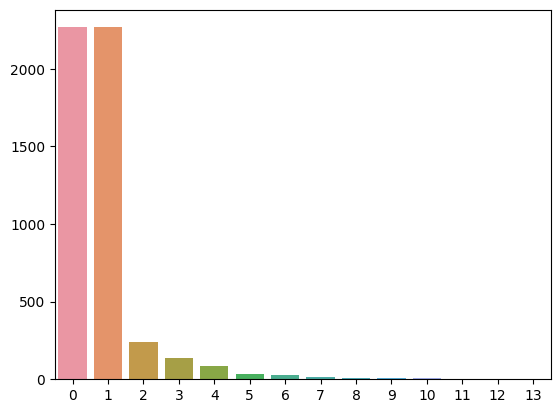

In [67]:
keys = list(duplicates_dict.keys())
# get values in the same order as keys, and parse percentage values
vals = [np.average(duplicates_dict[k]) for k in keys]
stds = [np.std(duplicates_dict[k]) for k in keys]
print(vals)
sns.barplot(x=keys, y=vals)#,errorbar = stds)


In [68]:
duplicates_dict[2]

[6, 2, 588, 74, 2, 97, 142, 3, 489, 24, 25, 1728, 1, 12, 378]

In [69]:
6+2+588+74+2+97+142+3+489+24+25+1728+1+12+378

3571